Final Tutorial by Arunima Arun and Ashwittha Ganesan

1 Introduction (talk about what we will be doing):

In this project, we want to analyze how different factors (such as age, insurance contractor's sex, BMI, number of children covered by insurance, beneficiary's residential region and whether an individual smokes) affect a primary beneficiary's individual medical charges billed by their health insurance.

2 Background Information:

Households in the United States spend an average of 8.1 percent of their yearly income on healthcare insurance according to a 2018 study conducted by the Bureau of Labor Statistics. 
https://www.bls.gov/opub/btn/volume-9/how-have-healthcare-expenditures-changed-evidence-from-the-consumer-expenditure-surveys.htm

Since Americans spend a large portion of their income on health insurance, we want to understand what factors influence how much an individual spends on medical charges. Therefore, we are using data collected from the book "Machine Learning with R" by Brett Lantz to conduct an analysis which we found on this website https://www.kaggle.com/mirichoi0218/insurance. This data includes insurance information of a random sample of 1338 primary beneficiaries. 

3 Getting Our Data:
First, we need to read in our data from the CSV file and store it into a dataframe.

In [86]:
import pandas as pd

url = 'https://www.kaggle.com/mirichoi0218/'
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


4 Visualize Data: 

Relationship between Smoking and Medical Charges

Next, we want to plot different columns of this dataframe to find patterns and relationships between columns. 
First, we will be plotting the smoker column and the charges column to see if whether or not a primary beneficiary smokes affects their individual medical charges. Below, I have created a violin plot consisting of two violins (one for all the individual medical charges for primary beneficiaries that are smokers and another for all the individual medical charges for primary beneficiaries that are not smokers).

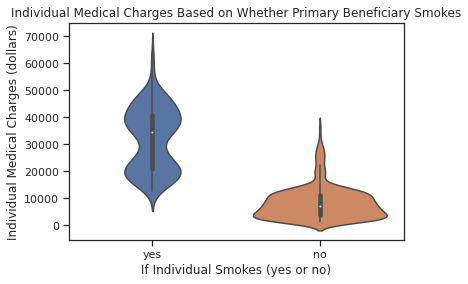

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.violinplot(x = 'smoker', y = 'charges', data = df)

#sets the title and labels the x and y axis
ax.set_xlabel("If Individual Smokes (yes or no)")
ax.set_ylabel("Individual Medical Charges (dollars)")
ax.set_title("Individual Medical Charges Based on Whether Primary Beneficiary Smokes")
fig.savefig("violin.png")

This violin plot shows that primary beneficiaries who don't smoke tend to have lower individual medical charges overall compared to those who smoke. This is because the orange violin for nonsmokers is skewed and clusters toward lower individual medical charge values than the blue violin for smokers (which is more unimodal).

Next, we want to see how the relationship between age and individual medical charges differs for primary beneficiaries that smoke and those who don't smoke. To do this, first we are going to filter the dataframe to only get the data for smokers. Then, we will create a scatter plot of age vs. individual medical charges for smokers to visualize this relationship

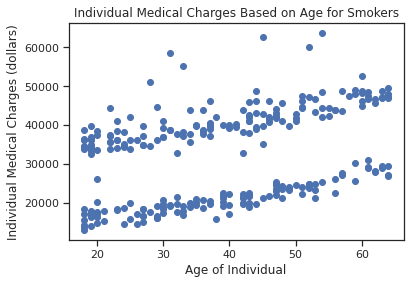

In [85]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

medical_charges_for_smokers_array = []
age_for_smokers_array = []

for index, row in df.iterrows():
    if row['smoker'] == 'yes':
        medical_charges_for_smokers_array.append(row['charges'])
        age_for_smokers_array.append(row['age'])
        
plt.title("Individual Medical Charges Based on Age for Smokers")
plt.xlabel("Age of Individual")
plt.ylabel("Individual Medical Charges (dollars)")

plt.scatter(age_for_smokers_array, medical_charges_for_smokers_array)

plt.show()

The scatter plot we created above shows that as age increases, an individual's medical charges increase for smokers. Next, we will create another scatter except this time we will plot age vs. individual medical charges for nonsmokers so we can compare the two scatter plots.

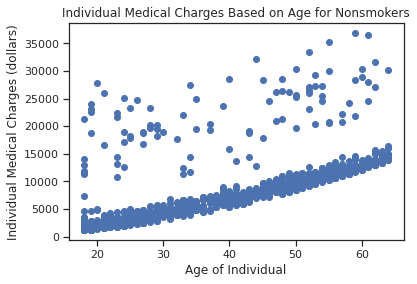

In [79]:
import matplotlib.pyplot as plt

medical_charges_for_nonsmokers_array = []
age_for_nonsmokers_array = []

for index, row in df.iterrows():
    if row['smoker'] == 'no':
        medical_charges_for_nonsmokers_array.append(row['charges'])
        age_for_nonsmokers_array.append(row['age'])
        
plt.title("Individual Medical Charges Based on Age for Nonsmokers")
plt.xlabel("Age of Individual")
plt.ylabel("Individual Medical Charges (dollars)")

plt.scatter(age_for_nonsmokers_array, medical_charges_for_nonsmokers_array)

In both scatter plots it appears that overall as age increases, the individual medical charges increase. Therefore, generally, for smokers and nonsmokers, as age increases, their individual medical charges increase

Relationship between Region and Medical Charges

Next, we want to visualize how the primary beneficiary's residential region affects their individual medical charges. In other words, is there a relationship between where the primary beneficiary resides and what their medical charges are? To analyze this we will a create a pie chart to see what proportion of the total medical charges each region accounts for.

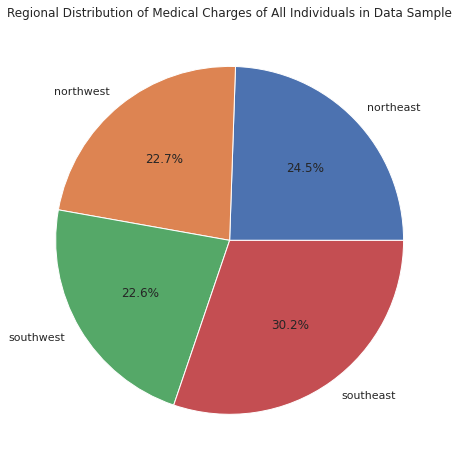

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

dict = {'region': ["northeast", "northwest", "southwest", "southeast"], 
        'total_charges': [0, 0, 0, 0]}

new_df = pd.DataFrame(dict)

for index, row in df.iterrows():
    if row['region'] == 'northeast':
        new_df.loc[0, 'total_charges'] = new_df.loc[0, 'total_charges'] + row['charges'] 
        
    elif row['region'] == 'northwest':
        new_df.loc[1, 'total_charges'] = new_df.loc[1, 'total_charges'] + row['charges']
    
    elif row['region'] == 'southwest':
        new_df.loc[2, 'total_charges'] = new_df.loc[2, 'total_charges'] + row['charges']
        
    else:
        new_df.loc[3, 'total_charges'] = new_df.loc[3, 'total_charges'] + row['charges']

new_df

plt.figure(figsize=(8,8))
plt.title('Regional Distribution of Medical Charges of All Individuals in Data Sample')
plt.pie(new_df.total_charges, labels = new_df.region, autopct ='%1.1f%%')
plt.show()

The pie chart above shows what percentage of the total medical charges are from a particular region. This pie chart suggests that people from the southeast are spending proportionally more on medical charges than people from the other regions. However, people from the northwest, northwest and southwest are spending similar amounts on medical charges.